# Steps to follow:

1- clean the dataset

2- Analysing all the null,Nan, missing values in the dataset

3- Preprocess the dataset removing the null values

4- visualize the data and again peprocess the dataset into an umbaised dataset

5- select the input and required output into a dataframe

6- Platform data visualization

7- convert all the objects types into integer types

8- split the train and test data to fit the model

9- create a model

10- Use NLP to preprocess the provided texts

11- predict the verification of the user

In [1]:
import spacy
import en_core_web_sm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
nlp = spacy.load('en_core_web_sm')

C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
data = pd.read_csv("vaccination_tweets.csv")
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
data.shape

(2518, 16)

In [16]:
verified_users = data[data["user_verified"]==True]
verified_users

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
12,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,2020-12-12 17:45:00,The agency also released new information for h...,NaN,TweetDeck,0,18,False
13,1337809196453081088,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 17:19:02,For all the women and healthcare providers who...,['PfizerBioNTech'],Twitter for iPhone,48,82,False
15,1337789467038523394,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12 16:00:38,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter for iPhone,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,1344623776923848706,Maria Graça Carvalho,"Lisbon, Portugal","Member European Parliament, SAM Unit, Former P...",2009-04-11 01:08:42,3661,2074,3217,True,2020-12-31 12:37:44,The main differences between #PfizerBioNTech #...,"['PfizerBioNTech', 'vaccine', 'AstraZeneca', '...",Twitter for iPhone,0,0,False
2504,1344499723990921216,حسن سجواني 🇦🇪 Hassan Sajwani,"Dubai, United Arab Emirates",Hassan Sajwani an #Emirati tweets #news #tech ...,2011-12-08 17:40:27,96276,597,32956,True,2020-12-31 04:24:48,"Dubai Health Authority Director-General, H.E. ...",['PfizerBioNTech'],Twitter for iPhone,5,33,False
2510,1344424399341047808,"Nataniel Lester-Coll, MD","Vermont, USA",Radiation Oncologist @UVMMedCenter Asst Prof @...,2014-01-14 21:31:32,3620,1732,20547,True,2020-12-30 23:25:29,🚨The #PfizerBioNTech #CovidVaccine trial is no...,"['PfizerBioNTech', 'CovidVaccine', 'VaccinesWo...",Twitter for iPhone,1,5,False
2516,1344405690966802433,anna holligan 🎙,"The Hague, The Netherlands",Foreign correspondent @bbcnews Journalist. Fil...,2009-01-17 06:58:29,24334,8337,17053,True,2020-12-30 22:11:09,People in NL tweeting me to say Dutch plan to ...,"['AstraZeneca', 'PfizerBioNTech']",Twitter for iPhone,2,9,False


In [17]:
verified_users[data["hashtags"].isnull()] 

C:\Users\DELL\AppData\Local\Temp/ipykernel_15296/937921522.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  verified_users[data["hashtags"].isnull()]


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
12,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,2020-12-12 17:45:00,The agency also released new information for h...,NaN,TweetDeck,0,18,False
23,1337773751841144833,BOOM Live,"Mumbai, India",IFCN certified fact-driven journalism. India's...,2014-03-16 03:52:50,64185,1183,1794,True,2020-12-12 14:58:11,The US Food and Drug Administration (FDA) has ...,NaN,Twitter Web App,1,5,False
88,1338560750571446273,KFDM News,"Beaumont, Texas",Providing news our viewers have been counting ...,2009-02-09 17:40:37,20014,1127,2550,True,2020-12-14 19:05:26,KFDM’s/FOX 4’s @THEPAIGEREPORT1 is at Baptist ...,NaN,Twitter for iPhone,3,2,False
126,1338475597195042816,770 CHQR Global News Radio,"Calgary, AB",Calgary’s Breaking News and Conversation Station.,2010-12-01 17:49:25,17025,1032,795,True,2020-12-14 13:27:04,Sunday evening’s shipment is the first of an i...,NaN,SocialFlow,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,1345611052268937216,The Daily Star,Bangladesh,Bangladesh's largest English Daily. The latest...,2009-09-27 08:54:28,859613,82,482,True,2021-01-03 06:00:49,Mexican authorities said they are studying the...,NaN,Twitter Web App,1,17,False
2260,1345598506807906304,FinancialXpress,"New Delhi, India","A complete up-to-date source for biz news, #fi...",2009-06-24 11:29:19,698166,28,4,True,2021-01-03 05:10:58,Mexican authorities said they are studying the...,NaN,Twitter Web App,1,8,False
2304,1345373680138858498,حسن سجواني 🇦🇪 Hassan Sajwani,"Dubai, United Arab Emirates",Hassan Sajwani an #Emirati tweets #news #tech ...,2011-12-08 17:40:27,96276,597,32956,True,2021-01-02 14:17:35,"Maj. Gen. Mohammed Al Marri, Director General ...",NaN,Twitter for iPhone,9,77,False
2337,1345206621572456448,Oneindia News,India,https://t.co/b2BCDYhPGV is a gamut of online r...,2008-12-16 09:44:12,64357,618,606,True,2021-01-02 03:13:45,The @WHO on Thursday granted emergency validat...,NaN,Twitter Web App,0,1,False


In [94]:
types=[]
for i in data["hashtags"]:
    if type(i) not in types:
        types.append(type(i))
types

[str, float]

In [92]:
len(types)

2518

In [7]:
data["source"].unique()

array(['Twitter for Android', 'Twitter Web App', 'Twitter for iPhone',
       'TweetDeck', 'Buffer', 'Twitter for iPad', 'Twitter Media Studio',
       'ThreadReaderApp', 'Instagram', 'SocialFlow', 'Hootsuite Inc.',
       'LinkedIn', 'Twitter for Mac', '24liveblog', 'Publer ', 'IFTTT',
       'Socialbakers', 'Falcon Social Media Management ', 'Echobox',
       'Microsoft Power Platform', 'Nonli', 'Sendible', nan, 'EastMojo',
       'Twitter Media Studio - LiveCut', 'GT_Backend', 'Tweetbot for Mac'],
      dtype=object)

In [12]:
re.sub(r"https?://[A-Za-z0-9./]+", 'https', data["text"][3])

"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https"

In [3]:
verified_users= data[data["user_verified"]==True]
accepted_texts = verified_users["text"].values
accepted_texts[:2]

array(["Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",
       'There have not been many bright days in 2020 but here are some of the best \n1. #BidenHarris winning #Election2020… https://t.co/77u4f8XXfx'],
      dtype=object)

In [5]:
def preprocessing(sentence):
    sentence = sentence.lower()
    sentence = sentence.replace('.', '')
    sentence = sentence.replace('[', '')
    sentence = sentence.replace(']', '')
    sentence = re.sub(r"https?://[A-Za-z0-9./]+", '', sentence)
    sentence = re.sub(r"[0-9]+", '', sentence)
    tokens = []
    tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
    tokens = ' '.join([element for element in tokens])
    
    return tokens

In [6]:
texts= ''
for text in accepted_texts:
    texts+= preprocessing(text)+' '

print( preprocessing(text))
texts = texts[:-1]

vaccines @realdonaldtrump right pfizerbiontech pfizervaccine modernavaccine moderna


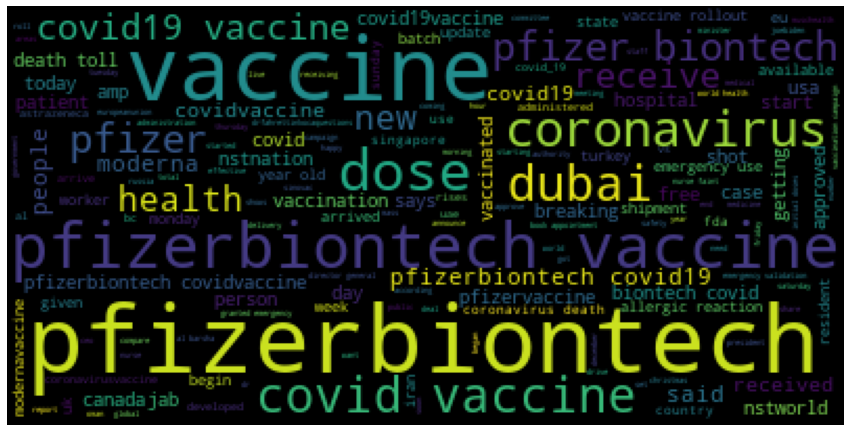

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud()
cloud = cloud.generate(texts)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');

In [113]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.518000e+03,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000
mean,1.341949e+18,6.342983e+04,1170.952740,13380.415012,1.715250,10.464654
std,2.768504e+15,4.762127e+05,2469.263253,41706.034152,12.237077,74.644921
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.339437e+18,1.140000e+02,165.000000,342.000000,0.000000,0.000000
50%,1.341481e+18,6.060000e+02,441.000000,1659.000000,0.000000,1.000000
75%,1.344353e+18,2.978000e+03,1191.000000,9733.750000,1.000000,4.000000
max,1.347131e+18,1.371493e+07,64441.000000,924667.000000,446.000000,2129.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2518 non-null   int64 
 1   user_name         2518 non-null   object
 2   user_location     1998 non-null   object
 3   user_description  2394 non-null   object
 4   user_created      2518 non-null   object
 5   user_followers    2518 non-null   int64 
 6   user_friends      2518 non-null   int64 
 7   user_favourites   2518 non-null   int64 
 8   user_verified     2518 non-null   bool  
 9   date              2518 non-null   object
 10  text              2518 non-null   object
 11  hashtags          1884 non-null   object
 12  source            2517 non-null   object
 13  retweets          2518 non-null   int64 
 14  favorites         2518 non-null   int64 
 15  is_retweet        2518 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 280.4+ KB


In [4]:
columns = []
for i in data.columns:
    columns.append(i)
columns

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

In [6]:
data.isnull().any()

id                  False
user_name           False
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags             True
source               True
retweets            False
favorites           False
is_retweet          False
dtype: bool

In [31]:
data.isnull().sum()

id                    0
user_name             0
user_location       520
user_description    124
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            634
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64

In [7]:
data.isnull()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2514,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

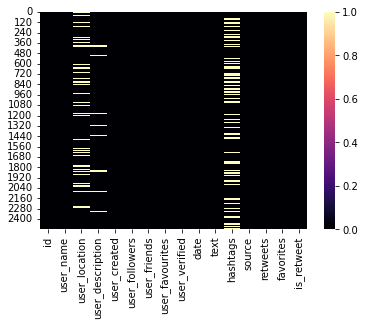

In [21]:
#Visualizing Missing Data using Seaborn heatmap()
sns.heatmap(data.isnull(),cmap='magma')

In [29]:
null_value_columns = []
for i in data.columns:
    if data[i].isnull().any() == True:
        null_value_columns.append(i)
null_value_columns

['user_location', 'user_description', 'hashtags', 'source']

In [30]:
data[data["source"].isnull()]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
1839,1344269125011562498,RoboForex Official,NaN,International broker that offers to trade 8 ty...,2020-11-16 16:22:43,84,1,20,False,2020-12-30 13:08:29,💉 #Pfizer and #BioNTech were the first to get ...,"['Pfizer', 'BioNTech']",NaN,0,0,False


In [ ]:
np.where(data['user_location'].isnull())

In [33]:
np.where(data['user_description'].isnull())

(array([  20,   46,   59,   78,   97,  121,  141,  144,  148,  153,  161,
         208,  213,  219,  230,  261,  309,  344,  373,  378,  379,  380,
         381,  383,  389,  398,  401,  405,  428,  465,  466,  498,  505,
         567,  591,  617,  636,  683,  694,  697,  751,  753,  790,  791,
         804,  813,  832,  833,  842,  849,  850,  863,  884,  893,  895,
        1039, 1041, 1089, 1127, 1138, 1162, 1167, 1170, 1176, 1177, 1195,
        1231, 1277, 1315, 1344, 1423, 1431, 1483, 1491, 1502, 1533, 1549,
        1609, 1611, 1621, 1623, 1626, 1678, 1693, 1695, 1713, 1716, 1770,
        1771, 1805, 1837, 1847, 1848, 1861, 1892, 1912, 1936, 1959, 1961,
        2036, 2044, 2076, 2080, 2090, 2094, 2095, 2110, 2142, 2165, 2199,
        2212, 2240, 2269, 2270, 2274, 2279, 2311, 2319, 2354, 2368, 2405,
        2415, 2453, 2472], dtype=int64),)

In [ ]:
np.where(data['hashtags'].isnull())

In [34]:
np.where(data['source'].isnull())

(array([1839], dtype=int64),)

In [3]:
# fill nan values with a sensable string
data['user_location'] = data["user_location"].fillna("Location Unavialable")
data['user_description'] = data["user_description"].fillna("User Description Unavialable")
data['hashtags'] = data["hashtags"].fillna("Hashtag Unavialable")
data['source'] = data["source"].fillna("Source Unavialable")

data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [5]:
for i in columns:
    print("number of unique values in",i,"is = ",len(np.unique(data[i])))

number of unique values in id is =  2518
number of unique values in user_name is =  1704
number of unique values in user_location is =  876
number of unique values in user_description is =  1614
number of unique values in user_created is =  1703
number of unique values in user_followers is =  1307
number of unique values in user_friends is =  1157
number of unique values in user_favourites is =  1616
number of unique values in user_verified is =  2
number of unique values in date is =  2516
number of unique values in text is =  2518
number of unique values in hashtags is =  1192
number of unique values in source is =  27
number of unique values in retweets is =  42
number of unique values in favorites is =  115
number of unique values in is_retweet is =  1


## 4 - Visualize the data

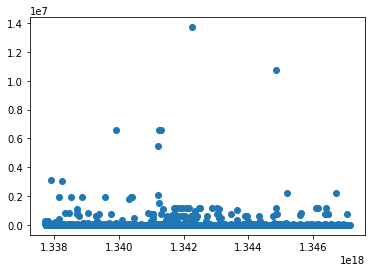

In [11]:
plt.scatter(data['id'],data['user_followers'])

- we can see that there are some outliers that deviates significantly from the thick line hence we can't use user_followers to train our model.

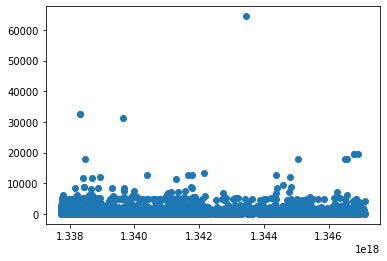

In [12]:
plt.scatter(data['id'],data['user_friends'])

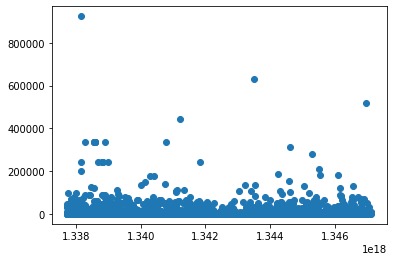

In [13]:
plt.scatter(data['id'],data['user_favourites'])

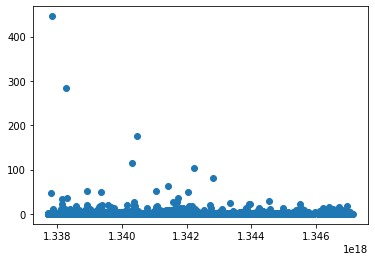

In [14]:
plt.scatter(data['id'],data['retweets'])

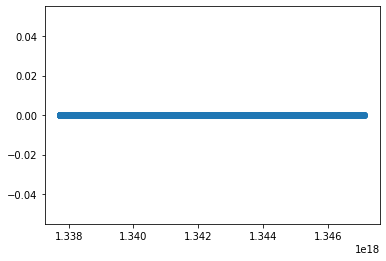

In [15]:
plt.scatter(data['id'],data['is_retweet'])

In [16]:
data.head(1)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False


In [17]:
from sklearn.preprocessing import LabelEncoder
data['user_name'] = LabelEncoder().fit_transform(data['user_name']) #Fit label encoder and return encoded labels.
data['user_location'] = LabelEncoder().fit_transform(data["user_location"])
data['user_description'] = LabelEncoder().fit_transform(data["user_description"])
data['hashtags'] = LabelEncoder().fit_transform(data["hashtags"])
data['source'] = LabelEncoder().fit_transform(data["source"])

In [18]:
data.head(1)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,1139,386,140,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,754,23,0,0,False


In [20]:
data.drop('date',axis=1,inplace=True)

In [21]:
data.head(2)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,1139,386,140,2009-04-08 17:52:46,405,1692,3247,False,Same folks said daikon paste could treat a cyt...,754,23,0,0,False
1,1338158543359250433,63,647,867,2009-09-21 15:27:30,834,666,178,False,While the world has been on the wrong side of ...,0,22,1,1,False


In [22]:
data.drop('id',axis = 1,inplace=True)
data.drop('user_created',axis = 1,inplace=True)

data['user_verified'].replace(False,0,inplace=True)
data['user_verified'].replace(True,1,inplace=True)
data['user_verified'] =data['user_verified'].astype(int)

data.drop('is_retweet',axis = 1,inplace=True)
data.head(1)

,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites
0,1139,386,140,405,1692,3247,0,Same folks said daikon paste could treat a cyt...,754,23,0,0


<AxesSubplot:xlabel='user_name', ylabel='count'>

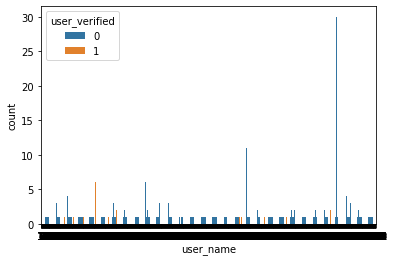

In [23]:
sns.countplot(x='user_name',hue='user_verified',data=data)

- we can see clearly that the number of unverified users is more than verified ones

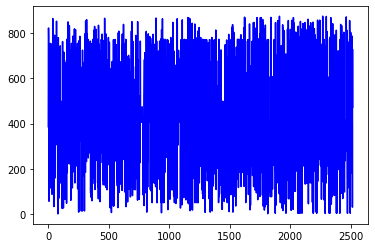

In [24]:
plt.plot(data["user_location"],color='b')
plt.show()

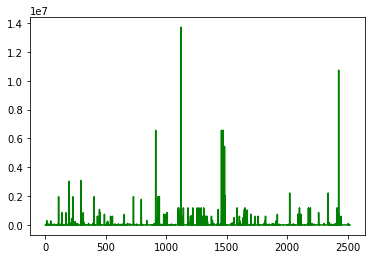

In [25]:
plt.plot(data['user_followers'],color='g')

<AxesSubplot:xlabel='user_location'>

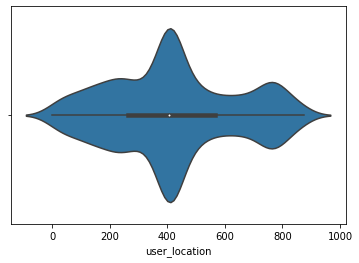

In [26]:
sns.violinplot(x='user_location',hue='user_verified',data=data)

In [32]:
take = []
drop = []
for j in data.columns:
    if j == 'text' or j == 'user_verified':
        take.append(j)
    else:
        drop.append(j)
drop

['user_name',
 'user_location',
 'user_description',
 'user_followers',
 'user_friends',
 'user_favourites',
 'hashtags',
 'source',
 'retweets',
 'favorites']

In [33]:
data.drop(drop,axis=1,inplace=True)

In [34]:
data.head()

,user_verified,text
0,0,Same folks said daikon paste could treat a cyt...
1,0,While the world has been on the wrong side of ...
2,0,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,1,"Facts are immutable, Senator, even when you're..."
4,0,Explain to me again why we need a vaccine @Bor...


# Train and test data

In [39]:
X= data.iloc[:,1].values
X

array(['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF',
       "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",
       '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P',
       ...,
       '#PfizerBioNTech #COVID19 "There is always a  light at the end of the tunnel, but the way out is through.” https://t.co/pF3WqGk0n1',
       'People in NL tweeting me to say Dutch plan to roll out #AstraZeneca before #PfizerBioNTech because it’s easier to a… https://t.co/Z33psqG4c5',
       'On #vaccines, .@realDonaldTrump  did everything right #PfizerBioNTech #PfizerVaccine #modernavaccine #Moderna… https://t.co/hus4f9t00J'],
      dtype=object)

In [41]:
y=data.iloc[:,0].values
y

array([0, 0, 0, ..., 0, 1, 1])

In [43]:
data.shape

(2518, 2)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [50]:
(X_train.shape, X_test.shape)

((1636,), (882,))

In [71]:
X_train_cleaned= [preprocessing(text) for text in X_train]

In [ ]:
X_test_cleaned= [preprocessing(text) for text in X_test]

In [54]:
from langdetect import detect
languages = [detect(sentence) for sentence in X_test_cleaned]

In [55]:
np.unique(languages, return_counts=True)

(array(['ca', 'da', 'de', 'en', 'es', 'et', 'fr', 'it', 'nl', 'pt', 'ro',
        'sl', 'sv'], dtype='<U2'),
 array([  9,   1,   5, 704,  20,   1,  12, 102,  14,   1,  11,   1,   1],
       dtype=int64))

# vaccination classifier with tf-idf

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)

In [74]:
X_train_tfidf.shape

(1636, 4429)

In [68]:
X_train_tfidf.shape

(1636, 4481)

In [ ]:
# vectorizer.get_feature_names()

In [77]:
X_test_tfidf = vectorizer.transform(X_test_cleaned)

In [76]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()
classifier.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [169]:
predictions = classifier.predict(X_test_tfidf)

In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, predictions)

0.8140589569160998

In [81]:
cm = confusion_matrix(y_test, predictions)
cm

array([[681,  81],
       [ 83,  37]], dtype=int64)

In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       762
           1       0.31      0.31      0.31       120

    accuracy                           0.81       882
   macro avg       0.60      0.60      0.60       882
weighted avg       0.81      0.81      0.81       882



# vaccination classifier with text processing of keras

<AxesSubplot:xlabel='user_verified', ylabel='count'>

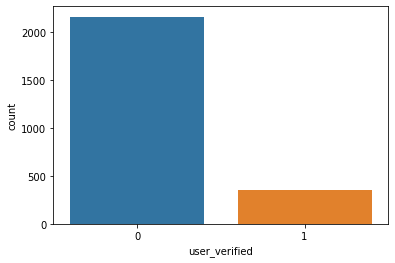

In [97]:
sns.countplot(x = 'user_verified',data=data)

In [98]:
verified_user = []
not_verified_user = []
for i in data['user_verified']:
    if i == 1:
        verified_user.append(i)
    else:
        not_verified_user.append(i)

In [99]:
print("percentage of verified user = ",((len(verified_user)/len(data['user_verified']))*100))

print("percentage of not verified user = ",((len(not_verified_user)/len(data['user_verified']))*100))

percentage of verified user =  14.138204924543288
percentage of not verified user =  85.86179507545671


In [ ]:
# pip install keras==2.6 same version as tensorflow

In [8]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [113]:
tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(X)

- fit_on_texts : This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2

 so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word

In [115]:
sequence = tokenizer.texts_to_sequences(X)
final_input = pad_sequences(sequence,maxlen=200,padding='pre')

- texts_to_sequences : Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary.

In [116]:
final_output = np.array(y)

In [117]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM,Dense,Embedding

In [118]:
model = Sequential()
model.add(
    Embedding(
        input_dim=10000,
        output_dim=120,
        input_length=200,
    ),)
model.add(
    Bidirectional(LSTM(64, return_sequences=True))
)
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 120)          1200000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         94720     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,336,001
Trainable params: 1,336,001
Non-trainable params: 0
_________________________________________________________________


In [119]:
# We specify the training configuration (loss, optimizer, metrics)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [120]:
# We call fit(), which will train the model by slicing the data into "batches" of size batch_size,
# and repeatedly iterating over the entire dataset for a given number of epochs.
pred = model.fit(final_input,final_output,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 59s 530ms/step - loss: 0.4172 - accuracy: 0.8586
Epoch 2/5
79/79 [==============================] - 42s 530ms/step - loss: 0.3676 - accuracy: 0.8586
Epoch 3/5
79/79 [==============================] - 42s 530ms/step - loss: 0.1686 - accuracy: 0.9174
Epoch 4/5
79/79 [==============================] - 42s 529ms/step - loss: 0.0284 - accuracy: 0.9948
Epoch 5/5
79/79 [==============================] - 42s 531ms/step - loss: 0.0184 - accuracy: 0.9988


In [123]:
batch_size= 32
data.shape[0]/batch_size

78.6875

In [125]:
model.save('vaccine delivery.h5') # creates a HDF5 file 'vaccine delivery.h5'
# after that reuse it: model = load_model('vaccine delivery.h5')

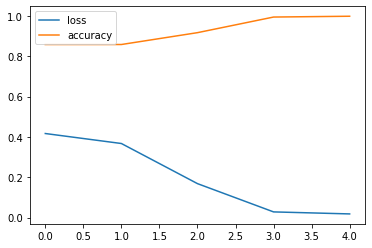

In [121]:
plt.plot(pred.history['loss'],label='loss')
plt.plot(pred.history['accuracy'],label='accuracy')
plt.legend(loc='best')
plt.show()

In [178]:
maxlenght = len(X[0])
for i in X:
    if maxlenght<len(i) : maxlenght= len(i) 
maxlenght # the longest text in the data.

148

In [181]:
def verification(details):
    sentence_list = []
    sentence_list.append(details)
#     print(sentence_list)
    fit = tokenizer.texts_to_sequences(sentence_list)
#     print(fit)
    sequence = pad_sequences(fit,maxlen=maxlenght,padding='pre')
#     print(sequence)
    output = model.predict(sequence)
#     print(output)
    if output[0][0] > 0:
        print("Verified User")
        return 1
    else:
        print("User is not verified")
        return 0


In [182]:
verification("Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF")

['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF']
[[480, 585, 105, 2694, 2695, 275, 1739, 10, 2696, 1740, 5, 3, 1, 2, 2697]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0  480  585  105 2694 2695  275 1739
    10 2696 1740    5    3    1    2 2697]]
[[-0.34427217]]
User is not verified


0

In [168]:
verification("Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF")

User is not verified


0

In [159]:
y[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [166]:
y_pred=[verification(text) for text in data["text"][:10].values]
y_pred

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]

* For the first ten examples we see clearly that the model predicts them 100% correct.

## footer section for diffrent methods training

##### understanding some concept about tokenizer with keras

- fit_on_texts : This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2

 so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word

In [25]:
tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(["Same", "cbat", "goes", "the", "same", "way", "twice"])

In [28]:
word_index = tokenizer.word_index
word_index

{'same': 1, 'cat': 2, 'goes': 3, 'the': 4, 'way': 5, 'twice': 6}

In [29]:
fit= tokenizer.texts_to_sequences(["Same"])
fit

[[1]]

##### play around with data frames

In [8]:
#an example out of the model.
df = pd.DataFrame([[1,'2'], [4, "a_string"]],
     index=['cobra', 'viper'],
     columns=['max_speed', 'shield'])
df

,max_speed,shield
cobra,1,2
viper,4,a_string


In [9]:
df[df["max_speed"]<3]

,max_speed,shield
cobra,1,2


In [10]:
df["shield"].str.isdecimal()

cobra     True
viper    False
Name: shield, dtype: bool

- trying LabelEncoder methode

In [62]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder().fit_transform(['amsterdam', 'paris', 'tokyo','paris'])

array([0, 1, 2, 1], dtype=int64)

In [65]:
from sklearn.preprocessing import LabelEncoder
lf = LabelEncoder().fit(['amsterdam', 'paris', 'tokyo','paris'])
lf.transform(list(lf.classes_))

array([0, 1, 2])

- did't give us the same thing though

In [7]:
83+111+109+101

404